In [2]:
import pandas as pd

tabela = pd.read_csv("cancelamentos.csv")
tabela = tabela.drop("CustomerID", axis=1)
#display(tabela)

#identificando e removendo valores vazios

display(tabela.info())
tabela=tabela.dropna() # limpando valores vazios
display(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881666 entries, 0 to 881665
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   idade                   881664 non-null  float64
 1   sexo                    881664 non-null  object 
 2   tempo_como_cliente      881663 non-null  float64
 3   frequencia_uso          881663 non-null  float64
 4   ligacoes_callcenter     881664 non-null  float64
 5   dias_atraso             881664 non-null  float64
 6   assinatura              881661 non-null  object 
 7   duracao_contrato        881663 non-null  object 
 8   total_gasto             881664 non-null  float64
 9   meses_ultima_interacao  881664 non-null  float64
 10  cancelou                881664 non-null  float64
dtypes: float64(8), object(3)
memory usage: 74.0+ MB


None

<class 'pandas.core.frame.DataFrame'>
Index: 881659 entries, 0 to 881665
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   idade                   881659 non-null  float64
 1   sexo                    881659 non-null  object 
 2   tempo_como_cliente      881659 non-null  float64
 3   frequencia_uso          881659 non-null  float64
 4   ligacoes_callcenter     881659 non-null  float64
 5   dias_atraso             881659 non-null  float64
 6   assinatura              881659 non-null  object 
 7   duracao_contrato        881659 non-null  object 
 8   total_gasto             881659 non-null  float64
 9   meses_ultima_interacao  881659 non-null  float64
 10  cancelou                881659 non-null  float64
dtypes: float64(8), object(3)
memory usage: 80.7+ MB


None

In [3]:
# quantas pessoas cancelaram e não cancelaram

display(tabela["cancelou"].value_counts())
display(tabela["cancelou"].value_counts(normalize=True).map("{:.1%}".format))

#verificando a proporção da taxa de cancelamento por contrato

display(tabela["duracao_contrato"].value_counts(normalize=True).map("{:.1%}".format))
display(tabela["duracao_contrato"].value_counts())

#Analisando o contrato Mensal
display(tabela.groupby("duracao_contrato").mean(numeric_only=True))

cancelou
1.0    499993
0.0    381666
Name: count, dtype: int64

cancelou
1.0    56.7%
0.0    43.3%
Name: proportion, dtype: object

duracao_contrato
Annual       40.2%
Quarterly    40.0%
Monthly      19.8%
Name: proportion, dtype: object

duracao_contrato
Annual       354395
Quarterly    353059
Monthly      174205
Name: count, dtype: int64

,idade,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,total_gasto,meses_ultima_interacao,cancelou
duracao_contrato,,,,,,,,
Annual,38.842165,31.446186,15.880213,3.263401,12.465156,651.697738,14.236107,0.460760
Monthly,41.552407,30.538555,15.499274,4.985649,15.007267,550.616435,15.478012,1.000000
Quarterly,38.830938,31.419916,15.886662,3.265245,12.460863,651.427783,14.234544,0.460255


In [4]:
#Descobrimos que o contatro mensal é ruim, removendo da analise

tabela=tabela[tabela["duracao_contrato"]!="Monthly"]

display(tabela)
display(tabela["cancelou"].value_counts())
display(tabela["cancelou"].value_counts(normalize=True).map("{:.1%}".format))



,idade,sexo,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,assinatura,duracao_contrato,total_gasto,meses_ultima_interacao,cancelou
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
5,51.0,Male,33.0,25.0,9.0,26.0,Premium,Annual,129.00,8.0,1.0
6,58.0,Female,49.0,12.0,3.0,16.0,Standard,Quarterly,821.00,24.0,1.0
7,55.0,Female,37.0,8.0,4.0,15.0,Premium,Annual,445.00,30.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
881661,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
881662,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
881663,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
881664,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


cancelou
0.0    381666
1.0    325788
Name: count, dtype: int64

cancelou
0.0    53.9%
1.0    46.1%
Name: proportion, dtype: object

In [5]:
#chegamos agora em menos da metade de pessoal cancelando, mas ainda é bem alta a taxa

display(tabela["assinatura"].value_counts(normalize=True))
display(tabela.groupby("assinatura").mean(numeric_only=True))

#podemos observar que a taxa de cancelamento é praticamente 1/3 para todos os tipos

assinatura
Standard    0.339648
Premium     0.338138
Basic       0.322215
Name: proportion, dtype: float64

,idade,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,total_gasto,meses_ultima_interacao,cancelou
assinatura,,,,,,,,
Basic,38.904813,32.316031,15.876921,3.310021,12.507054,648.642614,14.240814,0.475188
Premium,38.817814,30.977869,15.889673,3.235886,12.433427,653.337633,14.231150,0.452338
Standard,38.790478,31.048621,15.883393,3.249275,12.450690,652.566793,14.234280,0.454714


TypeError: plot() got an unexpected keyword argument 'x'

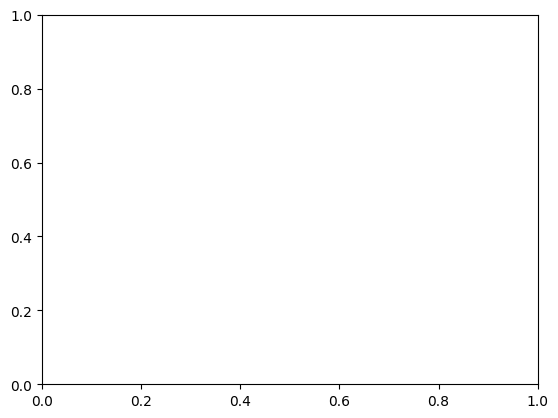

In [11]:
#Analise grafica para verificar

#
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

import plotly.express as px

for coluna in tabela.columns:
    grafico = plt.plot(x=coluna, color="cancelou")
    grafico.show()